In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

In [3]:
nx = 572
ny = 572

In [4]:
# generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)
generator = image_gen.RgbDataProvider(nx, ny, cnt=20, rectangles=True)

In [5]:
x_test, y_test = generator(1)

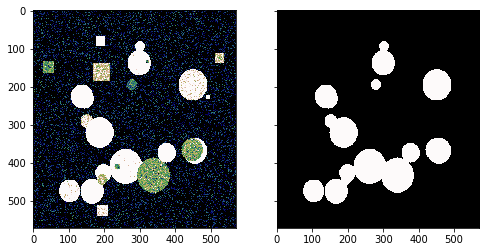

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [20]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

In [18]:
import tensorflow as tf

total_parameters = 0
for variable in tf.trainable_variables():
    shape = variable.get_shape()
    variable_parameters = 1
    for dim in shape:
        variable_parameters *= dim.value
    total_parameters += variable_parameters
print("This model has %d trainable parameters"% (total_parameters))


This model has 4248 trainable parameters


In [19]:
# trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.3))

In [10]:
path = trainer.train(generator, "./unet_trained", training_iters=32, epochs=10, display_step=2)

W0821 14:32:08.350136 140060536084288 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:360: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W0821 14:32:08.363139 140060536084288 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:333: The name tf.train.exponential_decay is deprecated. Please use tf.compat.v1.train.exponential_decay instead.

W0821 14:32:08.375690 140060536084288 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:339: The name tf.train.MomentumOptimizer is deprecated. Please use tf.compat.v1.train.MomentumOptimizer instead.

W0821 14:32:08.748737 140060536084288 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py

Epoch: 1 Total loss: 15.496030732989311 Training iters: 32 LR: 0.20000000298023224
Epoch: 2 Total loss: 12.10074944794178 Training iters: 32 LR: 0.18999998271465302
Epoch: 3 Total loss: 11.87332697212696 Training iters: 32 LR: 0.18049998581409454
Epoch: 4 Total loss: 11.168821856379509 Training iters: 32 LR: 0.17147497832775116
Epoch: 5 Total loss: 8.180042326450348 Training iters: 32 LR: 0.16290123760700226
Epoch: 6 Total loss: 8.786870226264 Training iters: 32 LR: 0.15475617349147797
Epoch: 7 Total loss: 8.28526322543621 Training iters: 32 LR: 0.14701835811138153
Epoch: 8 Total loss: 7.247482419013977 Training iters: 32 LR: 0.13966743648052216
Epoch: 9 Total loss: 6.2319567278027534 Training iters: 32 LR: 0.13268406689167023
Epoch: 10 Total loss: 7.0565048679709435 Training iters: 32 LR: 0.12604986131191254


In [11]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

W0821 14:34:52.013561 140060536084288 deprecation.py:323] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


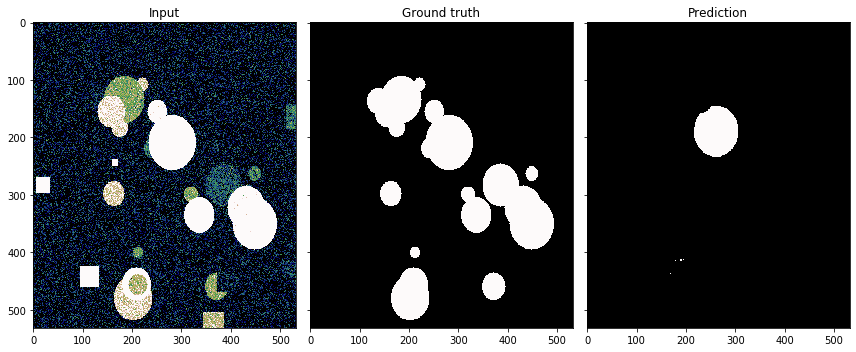

In [12]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")